<a href="https://colab.research.google.com/github/madhura-3/Liability-to-Loan-Conversion-Optimization-Project/blob/main/Liability_to_Loan_Conversion_Optimization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liability-to-Loan Conversion Optimization Project




*   **Data Description:** The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

*   **Context:** This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bank_data_df = pd.read_csv("/content/drive/MyDrive/Project 2024/Finance Project/Bank_Personal_Loan_Modelling.csv")
bank_data_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank_data_df.shape

(5000, 14)

##### Checking for NULL Values

In [ ]:
bank_data_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

##### Columns Details

In [ ]:
bank_data_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

###### Basic Overview

In [ ]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
bank_data_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


###### Univariate Analysis:

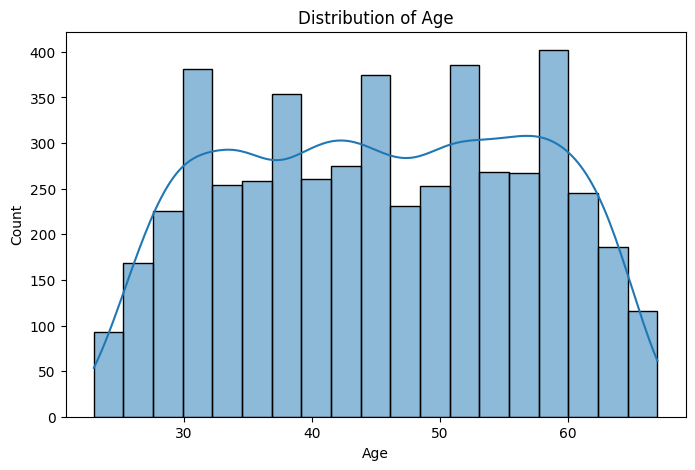

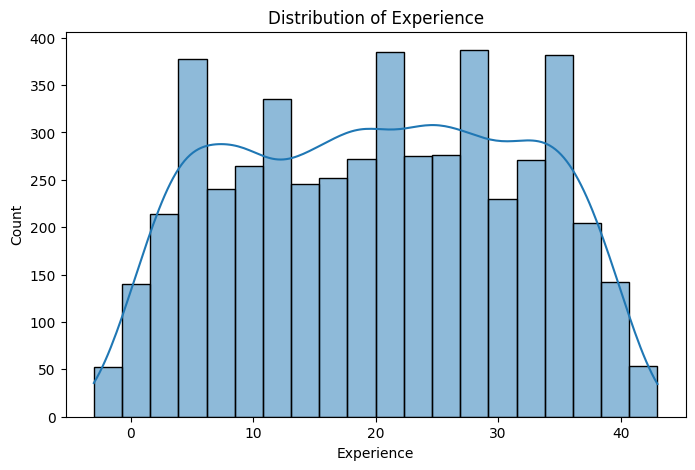

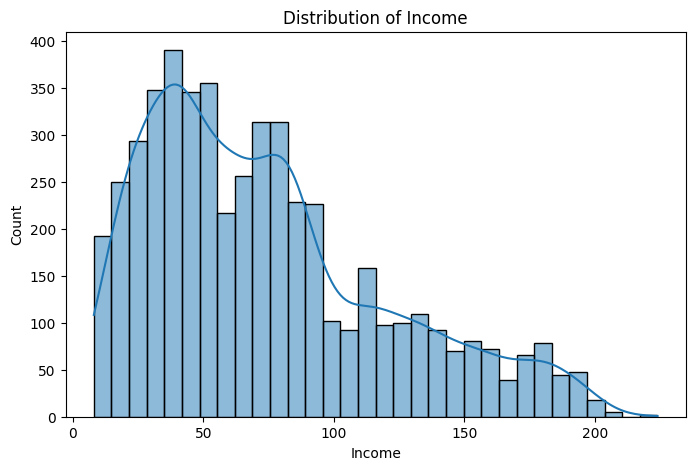

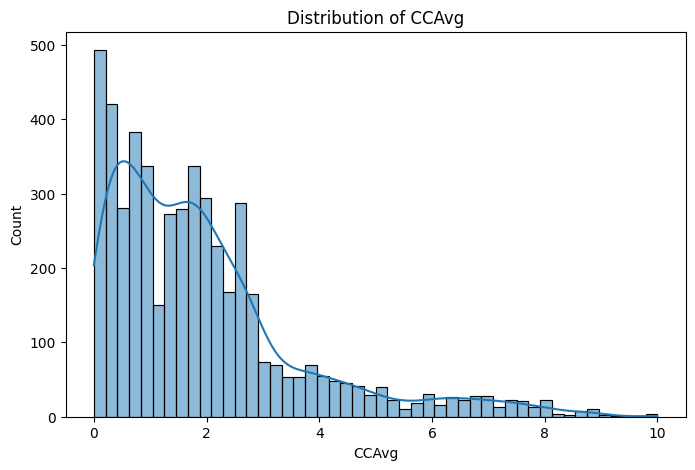

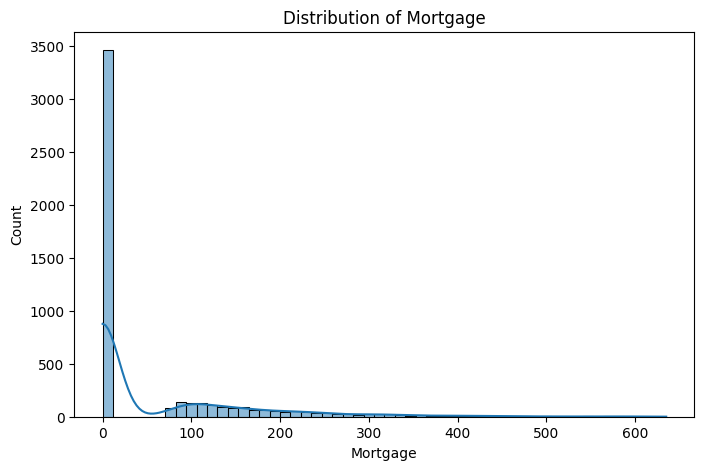

In [ ]:
# Numerical variables
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(bank_data_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

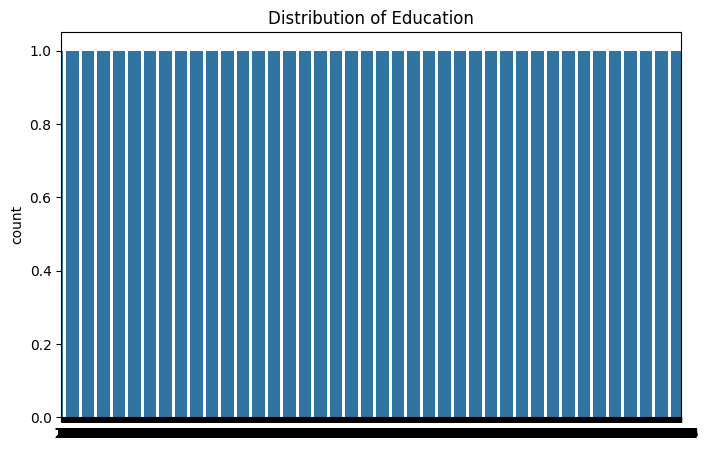

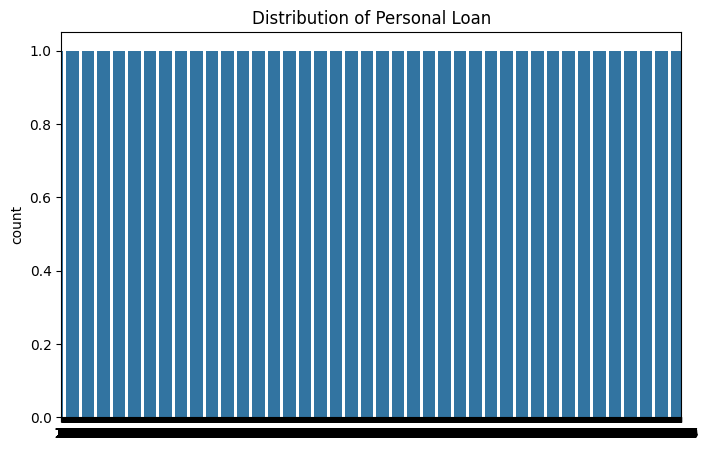

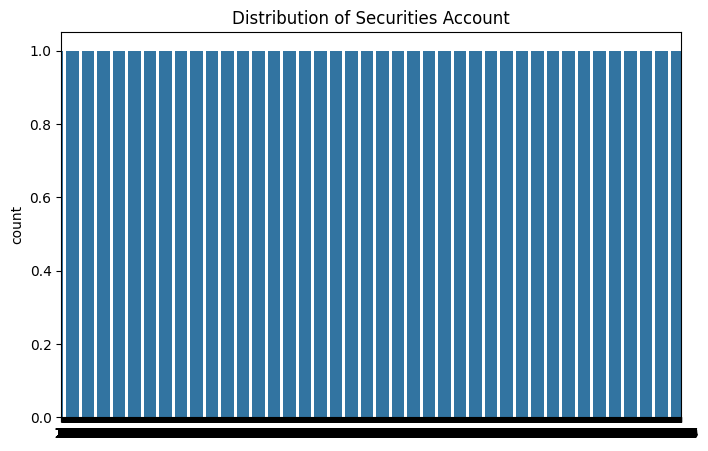

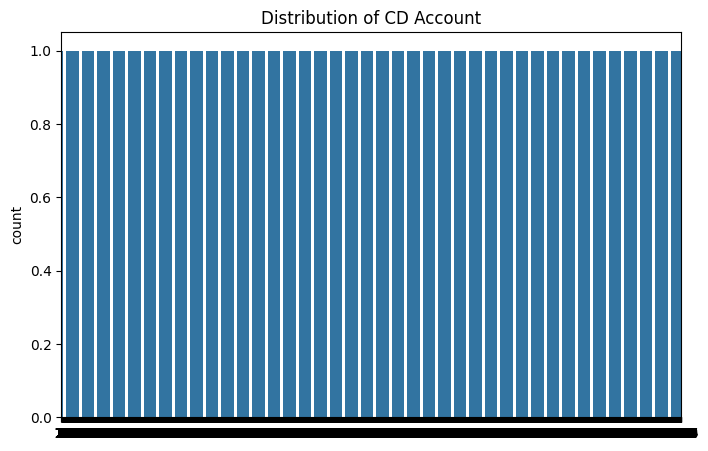

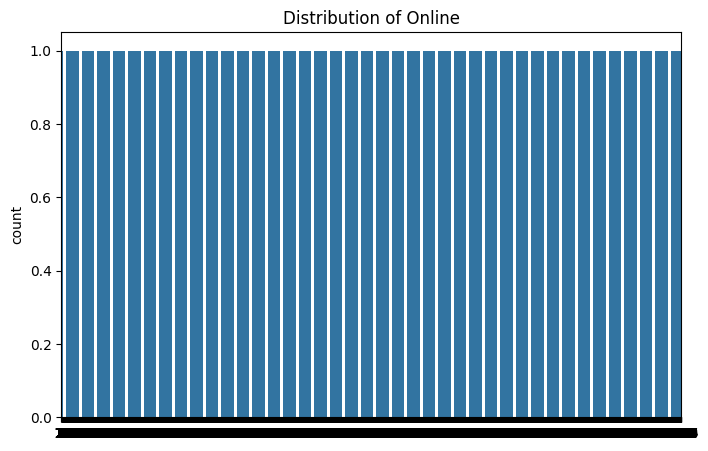

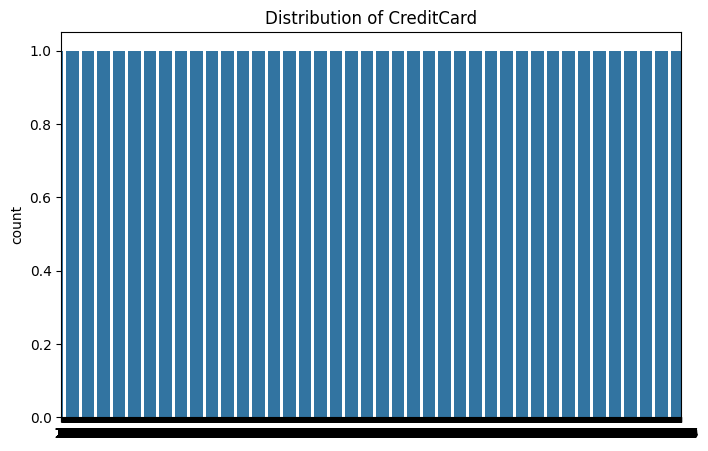

In [ ]:
# Categorical variables
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(bank_data_df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

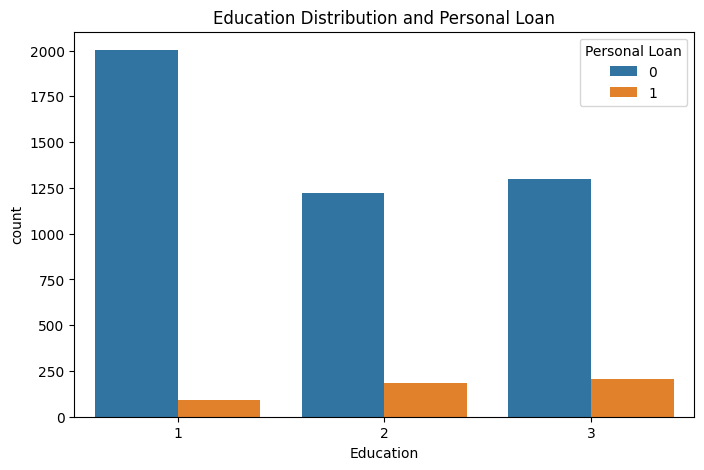

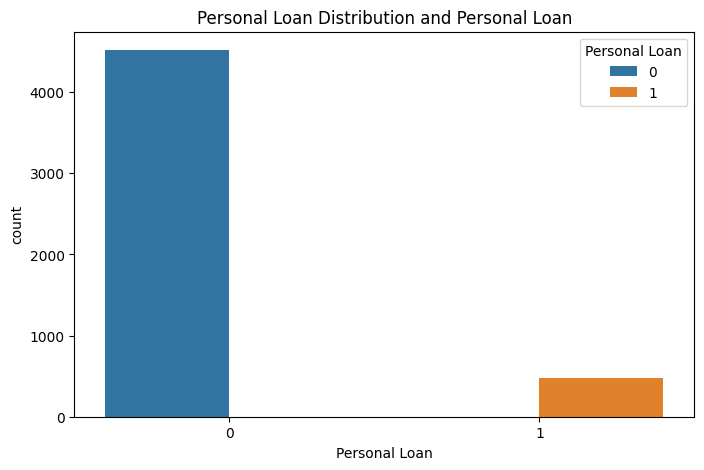

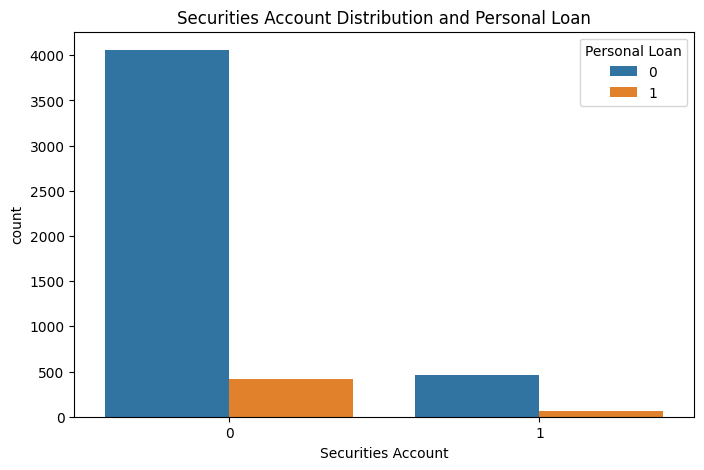

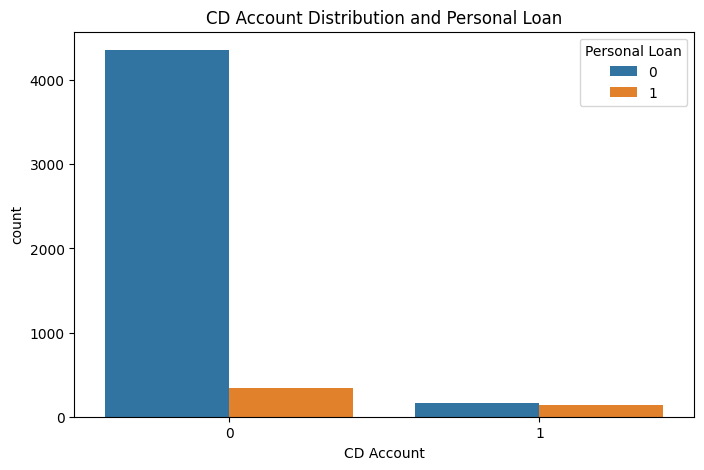

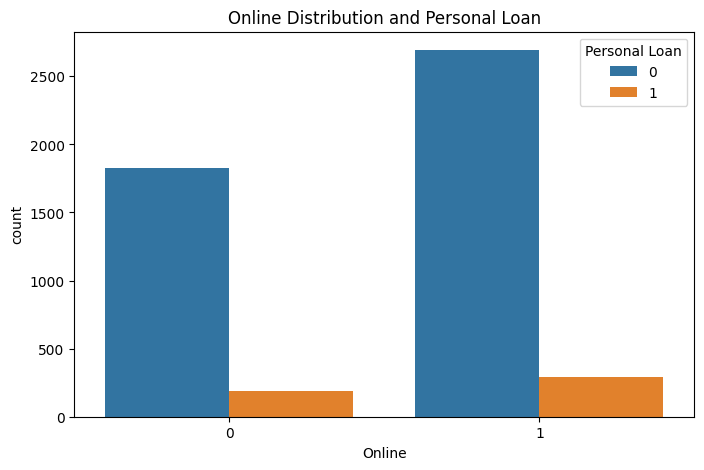

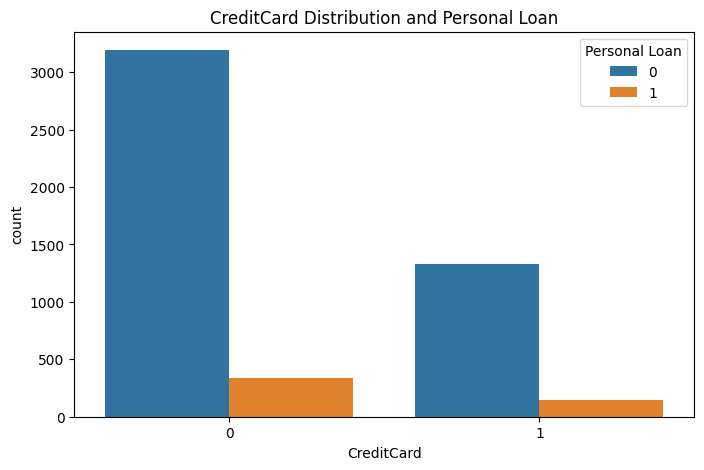

In [ ]:
# Proportion plots for categorical variables
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=bank_data_df, hue='Personal Loan', dodge=True)
    plt.title(f'{feature} Distribution and Personal Loan')
    plt.show()

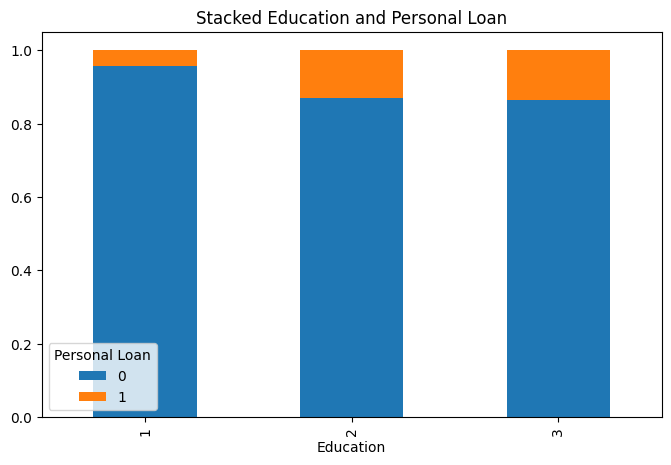

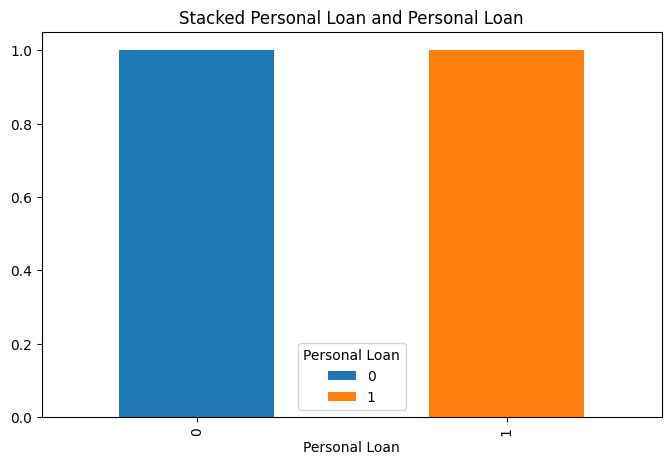

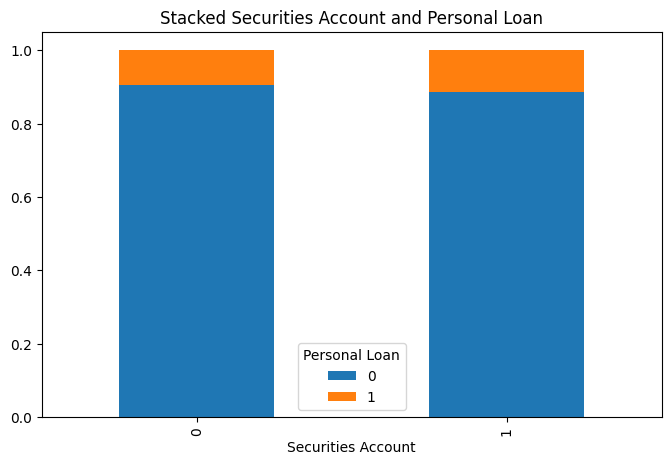

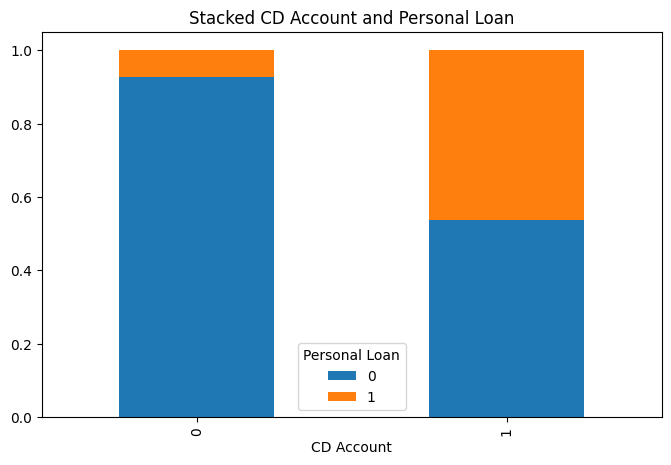

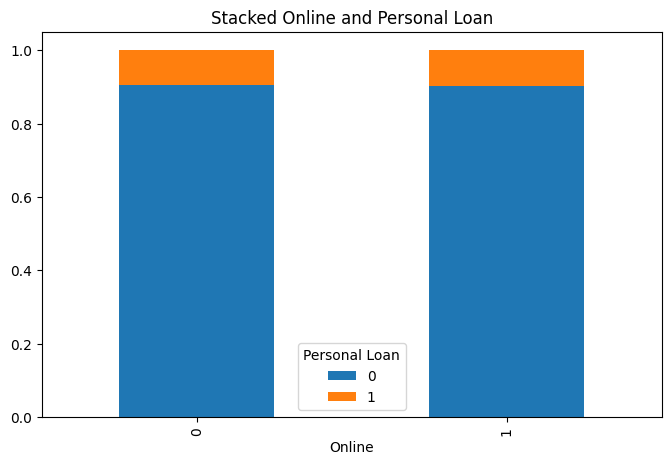

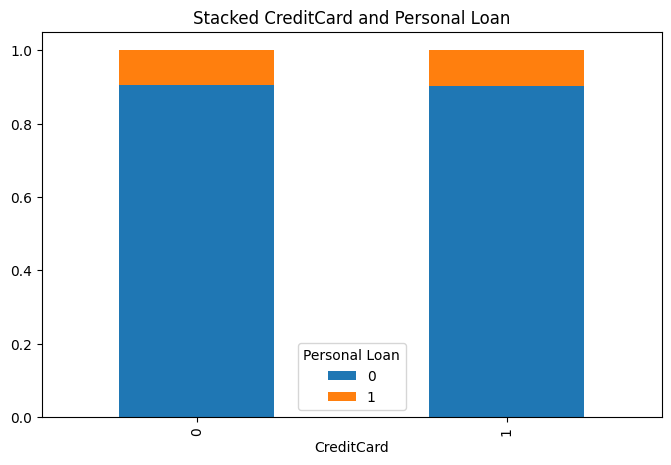

In [ ]:
# Stacked bar plots for categorical variables
for feature in categorical_features:
    ct = pd.crosstab(bank_data_df[feature], bank_data_df['Personal Loan'], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Stacked {feature} and Personal Loan')
    plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test for each categorical variable
for feature in categorical_features:
    contingency_table = pd.crosstab(bank_data_df[feature], bank_data_df['Personal Loan'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test for {feature}: p-value = {p}')

Chi-square test for Education: p-value = 6.991473868665428e-25
Chi-square test for Personal Loan: p-value = 0.0
Chi-square test for Securities Account: p-value = 0.14051497326319357
Chi-square test for CD Account: p-value = 7.398297503329848e-110
Chi-square test for Online: p-value = 0.6928599643141484
Chi-square test for CreditCard: p-value = 0.8843861223314504
